In [1]:
import pandas as pd
import numpy as np
from glob import glob
import os
%matplotlib inline

In [2]:
cwd = os.getcwd()
data_dir = cwd + '/data/whale/'

In [3]:
data_dir

'/home/ubuntu/courses/deeplearning1/nbs/data/whale/'

In [4]:
tr = pd.read_csv(data_dir+'/train.csv')

In [5]:
sub = pd.read_csv(data_dir+ 'sample_submission.csv')

In [6]:
sub.shape

(6925, 448)

In [7]:
tr.whaleID.nunique()

447

In [8]:
len(tr)

4544

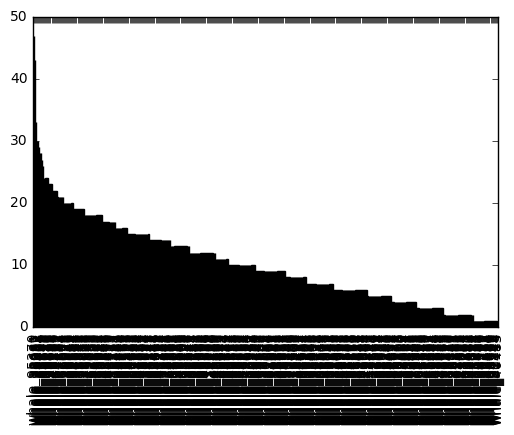

In [9]:
tr.whaleID.value_counts().plot(kind='bar')

### Make the test directory and move the test files to that directory.

In [11]:
% cd $data_dir
% mv w_7489.jpg imgs/

/home/ubuntu/courses/deeplearning1/nbs/data/whale


In [12]:
% cd imgs

/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs


In [13]:
% mkdir test
% cd $data_dir/imgs

/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs


In [14]:
os.getcwd()

'/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs'

In [15]:
imgs = glob('*.jpg')

In [16]:
len(imgs)

11469

In [17]:
files = pd.DataFrame(imgs, columns=['filename'])

In [18]:
files.head()

,filename
0,w_8037.jpg
1,w_2255.jpg
2,w_4494.jpg
3,w_3674.jpg
4,w_4673.jpg


In [19]:
test = files[~files.filename.isin(tr.Image)]

In [20]:
test.shape

(6925, 1)

In [21]:
os.path.join(os.getcwd(), test.iloc[0].filename)

'/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs/w_8037.jpg'

In [22]:
os.path.join(os.getcwd(), 'test', test.iloc[0].filename)

'/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs/test/w_8037.jpg'

In [23]:
for fname in test.filename:
    os.rename(os.path.join(os.getcwd(), fname),os.path.join(os.getcwd(), 'test', fname))


In [24]:
% cd test

/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs/test


In [25]:
% mkdir unknown

In [26]:
% mv *.jpg unknown/

In [27]:
% cd unknown

/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs/test/unknown


In [28]:
test_files = glob('*.jpg')

In [29]:
assert len(test_files) == len(sub)

### Make train and validation sets

- you need 447 whales in the training set.
- take all the ones


- shuffle the dataset.
- group the data by whale. take the first whale for the training set. then get a random sample of the rest.

In [30]:
tr.shape

(4544, 2)

In [31]:
tr.head()

,Image,whaleID
0,w_7812.jpg,whale_48813
1,w_4598.jpg,whale_09913
2,w_3828.jpg,whale_45062
3,w_8734.jpg,whale_74162
4,w_3251.jpg,whale_99558


In [32]:
for_train = []
tr = tr.sample(frac=1)
for w in tr.groupby('whaleID'):
    for_train.append(w[1].iloc[0,:].Image)

In [33]:
len(for_train)

447

In [34]:
left = tr[~tr.Image.isin(for_train)]

In [40]:
val = left.sample(n=900)

In [41]:
val.whaleID.nunique()

341

In [42]:
train_imgs = left[~left.Image.isin(val.Image)]

In [43]:
len(train_imgs) + len(for_train) + len(val) == len(tr)

True

In [44]:
train = np.concatenate([for_train, train_imgs.Image.values])

In [45]:
len(train)

3644

In [46]:
len(val)

900

### Create directories for the whales

In [47]:
% pwd

u'/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs/test/unknown'

In [48]:
% cd $data_dir/imgs/

/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs


In [49]:
% mkdir train
% mv *.jpg train/
% cd train

/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs/train


In [50]:
tr_df = tr[tr.Image.isin(train)]

In [51]:
tr_df.shape

(3644, 2)

In [52]:
for whale in tr_df.whaleID.unique():
    os.mkdir(whale)

In [53]:
for r in tr_df.iterrows():
    folder = r[1].whaleID
    fname = r[1].Image
    try:
        os.rename(os.path.join(os.getcwd(), fname), os.path.join(os.getcwd(), folder, fname))
    except:
        print(r)

In [54]:
% mkdir $data_dir/imgs/valid

In [55]:
% cd $data_dir/imgs/valid

/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs/valid


In [56]:
for whale in val.whaleID.unique():
    os.mkdir(whale)

In [57]:
% cd $data_dir/imgs/train

/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs/train


In [58]:
for r in val.iterrows():
    folder = r[1].whaleID
    fname = r[1].Image
    try:
        os.rename(os.path.join(os.getcwd(), fname), os.path.join(data_dir, 'imgs', 'valid', folder, fname))
    except:
        print(r)

In [59]:
% cd $data_dir/imgs/train

/home/ubuntu/courses/deeplearning1/nbs/data/whale/imgs/train


In [60]:
sum([len(files) for r, d, files in os.walk(data_dir + 'imgs/train')])

3644

In [61]:
sum([len(files) for r, d, files in os.walk(data_dir + 'imgs/valid')])

900

In [62]:
sum([len(files) for r, d, files in os.walk(data_dir + 'imgs/test/unknown')])

6925

In [63]:
len(os.listdir(data_dir + 'imgs/train'))

447

In [64]:
len(os.listdir(data_dir + 'imgs/valid'))

341